<a href="https://colab.research.google.com/github/guilhermelaviola/InterMilan/blob/main/InterManagers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [2]:
# Importing and displaying the last 10 managers in the dataset:
df = pd.ExcelFile('INTER.xlsx')
managers = pd.read_excel(df, 'Managers')
managers.tail(10)

,Manager,Nationality,Years in charge,Seasons,Matches,Wins,Draws,Losses,Win percentage,PPM
58,Claudio Ranieri,Italy,"2011, 2012",1,35,17,5,13,0.4857,1.60
59,Andrea Stramaccioni,Italy,"2012, 2013",2,65,31,11,23,0.4769,1.60
60,Walter Mazzarri,Italy,"2013, 2014",2,58,25,21,12,0.4310,1.66
61,Stefano Vecchi,Italy,"2016, 2017",1,5,3,0,2,0.6000,1.80
62,Stefano Pioli,Italy,"2016, 2017",1,27,14,3,10,0.5185,1.67
63,Luciano Spalletti,Italy,"2017, 2018, 2019",2,90,45,26,19,0.5000,1.79
64,Antonio Conte,Italy,"2019, 2020, 2021",2,102,64,23,15,0.6275,2.11
65,Simone Inzaghi,Italy,"2021, 2022, 2023, 2024",3,156,104,26,26,0.6667,2.17
66,Nino Resegotti,Italy,"1919, 1920",1,23,17,5,1,0.7391,2.43
67,Giuseppe Peruchetti,Italy,"1940, 1941",1,31,14,7,10,0.4516,1.58


In [3]:
# Displaying the number of rows and columns in the dataset:
managers.shape

(68, 10)

In [13]:
# Displaying statistical data of the numerical data present in the dataset:
managers.describe()

,Seasons,Matches,Wins,Draws,Losses,Win percentage,PPM
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,2.073529,66.014706,33.926471,16.794118,15.294118,0.472451,1.662353
std,1.557995,66.645306,37.967117,18.192633,12.528247,0.131391,0.386118
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,26.500000,13.000000,6.000000,8.750000,0.423850,1.540000
50%,2.000000,45.500000,21.000000,11.500000,12.000000,0.480000,1.680000
75%,2.000000,76.000000,38.500000,21.500000,16.500000,0.541950,1.872500
max,9.000000,366.000000,205.000000,93.000000,68.000000,0.739100,2.430000


# **Plotting basic column data**

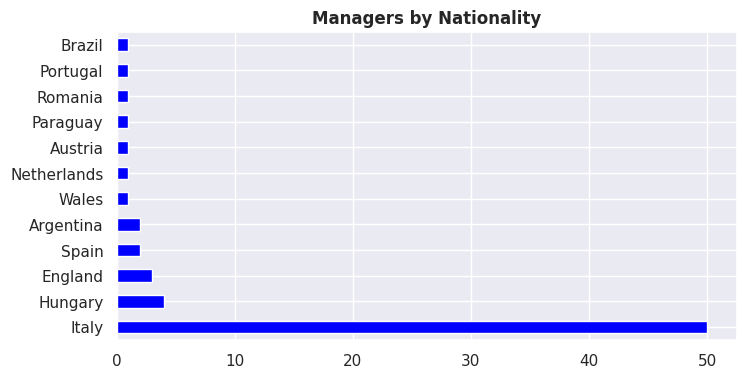

In [5]:
# Displaying managers by nationality:
managers['Nationality'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Managers by Nationality', fontweight = 'bold')
plt.show()

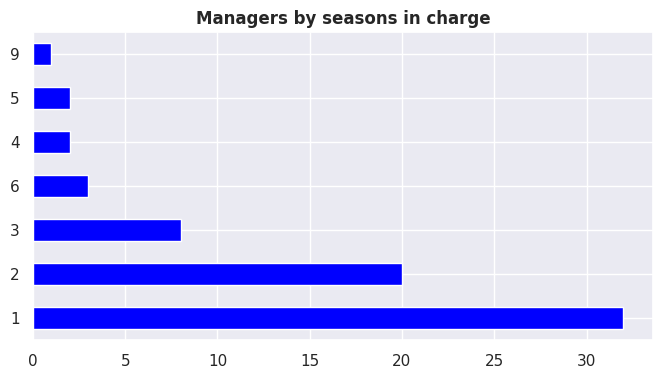

In [8]:
# Displaying managers by seasons in charge:
managers['Seasons'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Managers by seasons in charge', fontweight = 'bold')
plt.show()

In [22]:
# Classifying manager performances:
def manager_performance_win_pct(row):
  win_pct = (row['Win percentage'] * 100)
  if win_pct >= 60:
    return 'Excelent performance'
  elif win_pct < 60 and win_pct >= 50:
    return 'Great performance'
  elif win_pct < 50 and win_pct >= 30:
    return 'Average performance'
  else:
    return 'Bad performance'

# Applying the function above on a column of the dataset and generating a new column as result:
managers['Performance'] = managers.apply(manager_performance_win_pct, axis=1)
managers.tail()

,Manager,Nationality,Years in charge,Seasons,Matches,Wins,Draws,Losses,Win percentage,PPM,Performance
63,Luciano Spalletti,Italy,"2017, 2018, 2019",2,90,45,26,19,0.5000,1.79,Great performance
64,Antonio Conte,Italy,"2019, 2020, 2021",2,102,64,23,15,0.6275,2.11,Excelent performance
65,Simone Inzaghi,Italy,"2021, 2022, 2023, 2024",3,156,104,26,26,0.6667,2.17,Excelent performance
66,Nino Resegotti,Italy,"1919, 1920",1,23,17,5,1,0.7391,2.43,Excelent performance
67,Giuseppe Peruchetti,Italy,"1940, 1941",1,31,14,7,10,0.4516,1.58,Average performance


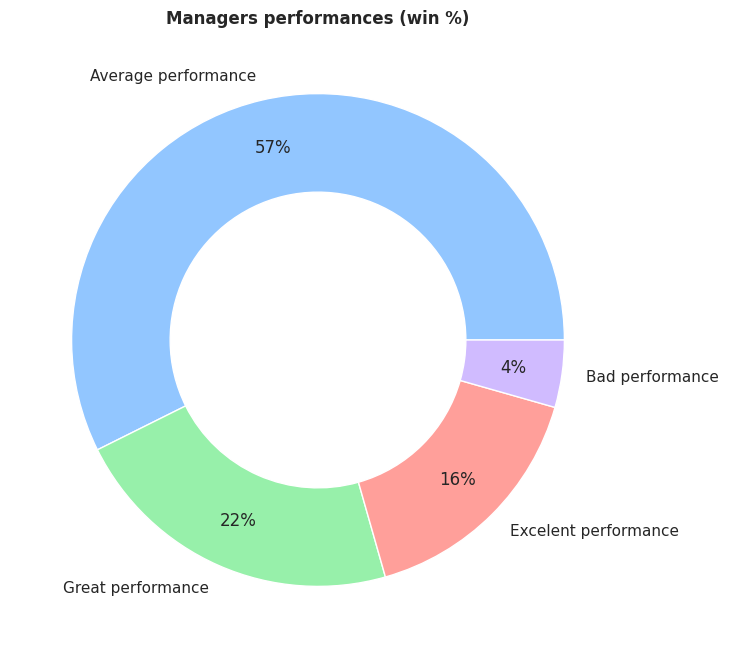

In [26]:
# Displaying managers performances (win %):
managers['Performance'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Managers performances (win %)', fontweight = 'bold')
plt.show()

In [29]:
# Classifying manager performances (PPM):
def manager_performance_ppm(row):
  ppm = (row['PPM'])
  if ppm >= 2.3:
    return 'Excelent performance'
  elif ppm < 2.3 and ppm >= 2:
    return 'Great performance'
  elif ppm < 2 and ppm >= 1:
    return 'Average performance'
  else:
    return 'Bad performance'

# Applying the function above on a column of the dataset and generating a new column as result:
managers['PPM performance'] = managers.apply(manager_performance_ppm, axis=1)
managers.tail()

,Manager,Nationality,Years in charge,Seasons,Matches,Wins,Draws,Losses,Win percentage,PPM,Performance,PPM performance
63,Luciano Spalletti,Italy,"2017, 2018, 2019",2,90,45,26,19,0.5000,1.79,Great performance,Average performance
64,Antonio Conte,Italy,"2019, 2020, 2021",2,102,64,23,15,0.6275,2.11,Excelent performance,Great performance
65,Simone Inzaghi,Italy,"2021, 2022, 2023, 2024",3,156,104,26,26,0.6667,2.17,Excelent performance,Great performance
66,Nino Resegotti,Italy,"1919, 1920",1,23,17,5,1,0.7391,2.43,Excelent performance,Excelent performance
67,Giuseppe Peruchetti,Italy,"1940, 1941",1,31,14,7,10,0.4516,1.58,Average performance,Average performance


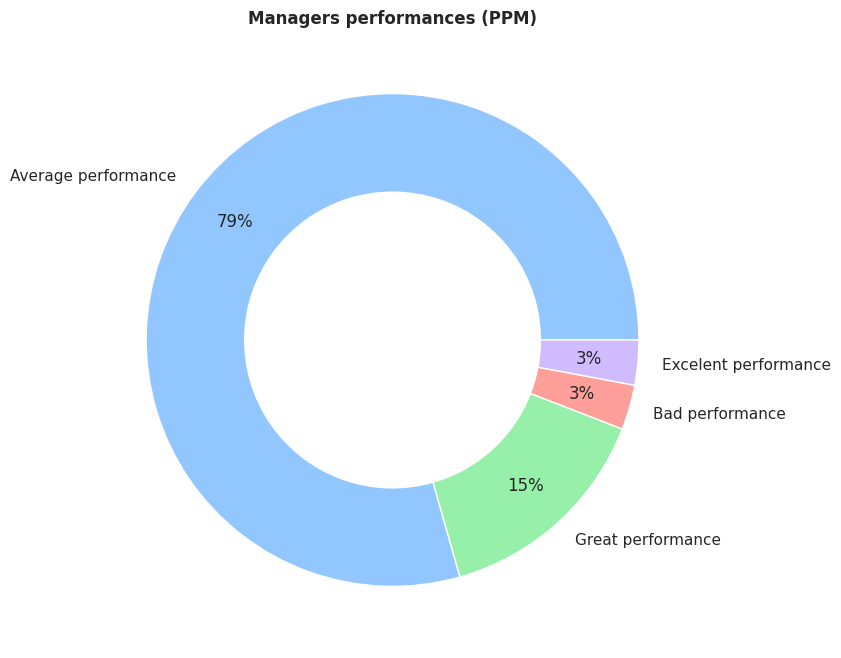

In [30]:
# Displaying managers performances (PPM):
managers['PPM performance'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Managers performances (PPM)', fontweight = 'bold')
plt.show()

# **Plotting Inter presidents and managers who most signed players**

In [33]:
# Converting the Manager column data into string:
managers['Years in charge'] = managers['Years in charge'].astype(str)

# Splitting the managers names by comma and removing leading spaces:
managers['Years in charge'] = managers['Years in charge'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
years = managers.explode('Years in charge')

# Counting Matrix using crosstab method:
year_counts = pd.crosstab(index = years.index, columns = years['Years in charge'], margins = False).to_dict('index')
year_counts = pd.DataFrame(year_counts)

# Counting the number of 0s and 1s in each row:
year_counts_final = (year_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [35]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
year_counts_final = pd.DataFrame(year_counts_final.tolist(), index = year_counts_final.index, columns = ['False', 'True'])
print(year_counts_final)

AttributeError: 'DataFrame' object has no attribute 'tolist'